In [1]:
#%% IMPORT PACKAGES
import numpy as np
import pandas as pd
from matplotlib import rcParams  # next 3 lines set font family for plotting
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['TImes New Roman']
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import os
import h5py
import pickle
import seaborn as sns

# set working directory (change the following path to match your directory structure)
main = 'C:\\Users\\Kathy_Breen\\Documents\\DL_Seminar\\Week3'  # set directory path where this file is saved
os.chdir(main)  # make sure the Spyder is pointing to the correct 

In [2]:
#%% Read in *.hdf5 data sets

with h5py.File('X.hdf5','r') as f:
    X_test = np.array(f["X_test"])

with h5py.File('Y.hdf5','r') as f:
    Y_test = np.array(f["Y_test"])

In [3]:
#%% load, read output

hparams = pd.read_csv('h_tuning.txt',sep='\t')
rundict = pickle.load( open( "HyperParamOut.pkl", "rb" ))
Ymse_MLP = []

for run in rundict.keys():
    Ymse_MLP.append(rundict[run]['Y_mse'])
    print(rundict[run]['Y_mse'])

# find minimum loss for each permutation of parameters and plot
loss_min = np.min(Ymse_MLP)
min_idx = np.argmin(Ymse_MLP)

# define temporary histdict for plotting using the "best" run for each modeltype
histdict = rundict[min_idx]['histdict']

2.1912402266130595
0.0005592641259709909
0.00014763628014974285
0.00012109783016172384
0.00014975153299554456
0.0007583016096143587
0.00021291794942361193
0.0002451881957300616
0.00034594098956065286
0.0002581212206096743
2.191073500861349
2.1912138805437835
2.1905858078781426
0.0003896286039025265
0.00028278177610453536
2.1913964698421173
2.191295594577944
2.191314588483679
0.0009593100661892775
0.0017419185111640656
2.191156884632089
2.191210458568173
0.0022508669541735256
0.0018423189387635147
2.191382201967397
0.00035438796061327686
0.00013629605068918578
0.0002094344827652709
0.00027369714164061183
6.264332595788443e-05
0.0004733379895782292
0.0002655854207772202
0.0002905879722509894
0.0002592931090640633
0.00015667247128839083
2.1913018887338818
0.00044197535523968467
0.00044933189267954505
0.0004583337159174129
0.000509410029103438
2.1912614733592513
2.19131633650556
2.191205912516667
0.000973297630347594
0.0007556170202782221
0.003632643399204923
0.001556870781618824
0.0022730

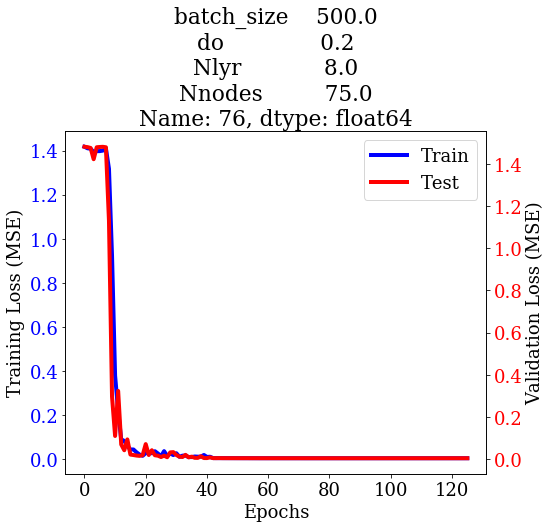

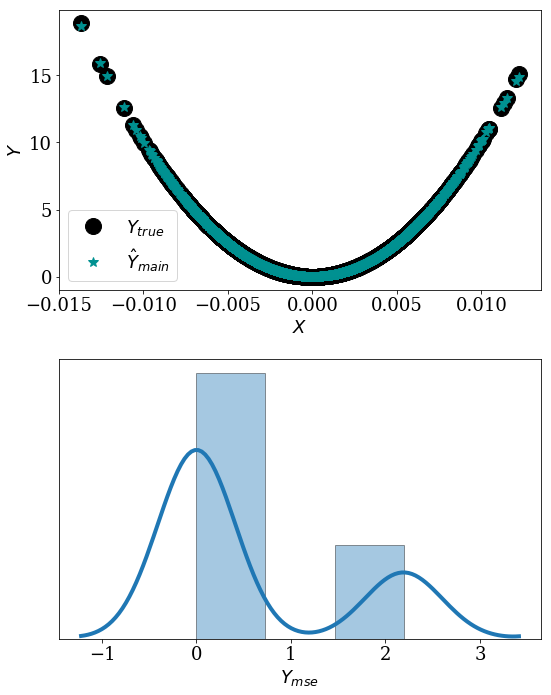

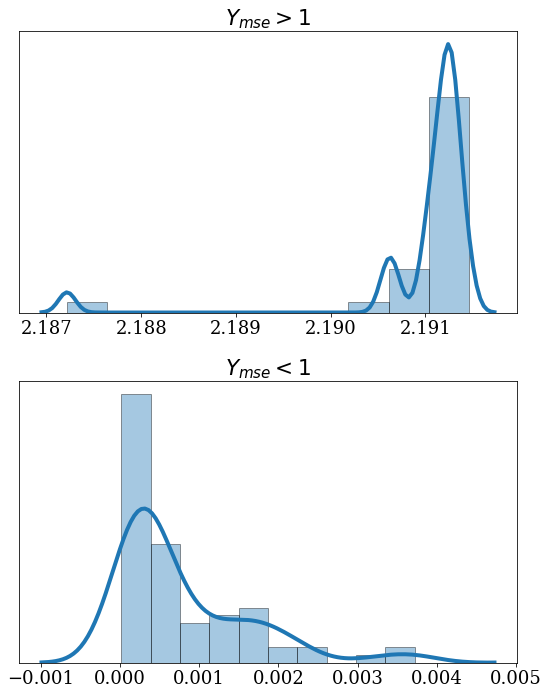

In [4]:
#%% PLOT OUTPUT

# define datasets to plot
loss_train = histdict['loss']
loss_test = histdict['val_loss']
xplot = list(range(len(loss_train)))
Ymse_MLP = np.array(Ymse_MLP)  # change to numpy array 

# plot
fig = plt.figure(num=1, figsize=(8,6))
ax1 = fig.add_subplot(111)
train = ax1.plot(xplot,np.sqrt(loss_train),'b-', label='Train', linewidth=4)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss (MSE)')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
test = ax2.plot(xplot,np.sqrt(loss_test),'r-',label='Test',linewidth=4)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation Loss (MSE)')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
curves = train + test
labels = [c.get_label() for c in curves]
ax1.legend(curves, labels, loc=0)
plt.tight_layout()
plt.title(str(hparams.loc[min_idx,:]))
plt.savefig('HP_best_loss.png')
plt.show()

fig = plt.figure(num=2, figsize=(8,10))
ax1 = fig.add_subplot(211)
y_true = ax1.plot(X_test,Y_test,'ko',markersize=16,label=r'$Y_{true}$')
y_pred = ax1.plot(X_test,rundict[min_idx]['predict'],'*',color='#009191',markersize=10,label=r'$\hat{Y}_{main}$')
curves = y_true+y_pred
labels = [c.get_label() for c in curves]
ax1.legend(curves, labels, loc=0)
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax2 = fig.add_subplot(212)
sns.distplot(Ymse_MLP,  # data to plot 
             hist=True,  # plot histogram
             kde=True,   # overlay kernel density function (PDF)
             ax=ax2,  # plot on the existing axis object created for this figure
             hist_kws={'edgecolor':'black'},  # set color to outline hist bins
             kde_kws={'linewidth': 4}  # use a thick line for the kde
             )
ax2.set_xlabel(r'$Y_{mse}$')
ax2.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('HP_best_yyhat.png')
plt.show()

fig = plt.figure(num=3, figsize=(8,10))
ax1 = fig.add_subplot(211)
sns.distplot(Ymse_MLP[Ymse_MLP > 1],  # data to plot 
             hist=True,  # plot histogram
             bins=10,  # number of bins to use in histogram
             kde=True,   # overlay kernel density function (PDF)
             ax=ax1,  # plot on the existing axis object created for this figure
             hist_kws={'edgecolor':'black'},  # set color to outline hist bins
             kde_kws={'linewidth': 4}  # use a thick line for the kde
             )
ax1.set_title(r'$Y_{mse} > 1$')
ax1.get_yaxis().set_visible(False)
ax2 = fig.add_subplot(212)
sns.distplot(Ymse_MLP[Ymse_MLP < 1],  # data to plot 
             hist=True,  # plot histogram
             bins=10,  # number of bins to use in histogram
             kde=True,   # overlay kernel density function (PDF)
             ax=ax2,  # plot on the existing axis object created for this figure
             hist_kws={'edgecolor':'black'},  # set color to outline hist bins
             kde_kws={'linewidth': 4}  # use a thick line for the kde
             )
ax2.set_title(r'$Y_{mse} < 1$')
ax2.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('HP_best_dist.png')
plt.show()